In [ ]:
import os 
os.environ['GOOGLE_GEMINI_API_KEY']=

In [ ]:
# Gemini models can process documents in PDF format, using native vision to understand entire document contexts. This goes beyond simple text extraction, allowing Gemini to:

# Analyze and interpret content, including text, images, diagrams, charts, and tables, even in long documents up to 1000 pages.
# Extract information into structured output formats.
# Summarize and answer questions based on both the visual and textual elements in a document.
# Transcribe document content (e.g. to HTML), preserving layouts and formatting, for use in downstream applications.

In [8]:
from google import genai 
from google.genai import types 
from dotenv import load_dotenv
load_dotenv()

api_key=os.getenv("GOOGLE_API_KEY") or os.getenv('GEMINI_API_KEY')

if not api_key :
    raise ValueError("api key is not found")

client = genai.Client(api_key = api_key)

In [ ]:
import httpx
# document URL
doc_url = "https://www.ril.com/sites/default/files/2025-08/RIL-Integrated-Annual-Report-2024-25.pdf"

document_data = httpx.get(url=doc_url).content      #convert the file content into binary formate 

In [12]:
# here in the just next cell in the prvious we just pass our prompt or query but 
# we also pass some more elements with contents to llm for process .
# we pass array like this :- 

# contents=[
#       types.Part.from_bytes(
#         data=doc_data,
#         mime_type='application/pdf',
#       ),
#       prompt])


In [ ]:
with open("RIL-IAR-2025.pdf", "rb") as f:
    document_data = f.read()

prompt = "Summarize the document"

response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents=[
        types.Part.from_bytes(
            data=document_data,
            mime_type="application/pdf"
        ),
        prompt
    ]
)

print(response.text)


This document is the Integrated Annual Report 2024-25 for Reliance Industries Limited (RIL), outlining its financial, operational, and sustainability performance, strategic vision, and governance for the fiscal year ended March 31, 2025.

**1. Overall Vision and Identity:**
*   RIL is India’s largest private-sector enterprise and a Fortune Global 500 leader, driven by the philosophy "What is Good for India is Good for Reliance" and an unshakeable belief that 'Growth is Life'.
*   It aims to be a deep-tech enterprise, shaping India's future through innovation, sustainability, and inclusion, contributing to the nation's "Viksit Bharat" vision.

**2. Key Financial and Operational Highlights (Consolidated, FY24-25):**
*   **Revenue:** ₹10,71,174 Crore (US$ 125.3 Billion), a 7.1% Y-o-Y increase.
*   **EBITDA:** ₹1,83,422 Crore (US$ 21.5 Billion), a 2.9% Y-o-Y increase (consumer businesses contributed over 50%).
*   **Net Profit (PAT):** ₹81,309 Crore (US$ 9.5 Billion), a 2.9% Y-o-Y increase

In [16]:
prompt = " summerize the document "

response = client.models.generate_content(
    model = 'gemini-2.5-flash' ,
    contents = [
        types.Part.from_bytes(
            data = document_data,
            mime_type = "application/pdf"
        ), prompt 
    ]
)

In [19]:
print(response.text)

Reliance Industries Limited (RIL) has published its Integrated Annual Report for FY 2024-25, titled "Realising Aspirations," highlighting its commitment to driving India's growth through innovation, sustainability, and inclusive development.

**Key Highlights of FY 2024-25:**

*   **Financial Performance:**
    *   **Consolidated Revenue:** ₹10,71,174 Crore (US$ 125.3 Billion), up 7.1% Y-o-Y.
    *   **Consolidated EBITDA:** ₹1,83,422 Crore (US$ 21.5 Billion), up 2.9% Y-o-Y. Consumer businesses contributed over 50% of EBITDA.
    *   **Consolidated Net Profit:** ₹81,309 Crore (US$ 9.5 Billion), up 2.9% Y-o-Y.
    *   **Consolidated Total Equity:** Exceeded ₹10,00,000 Crore, making RIL the first Indian company to achieve this milestone.
    *   **Exports:** ₹2,83,719 Crore.
    *   **Capital Expenditure (Capex):** ₹1,31,107 Crore (US$ 15.3 Billion), focused on new O2C projects, Retail expansion, Digital Services infrastructure, and New Energy manufacturing.
    *   **Total Value Added:*

In [ ]:
#just checking our model is working flently or not for this i just read 2nd and 3rd page manually and then 
# also summarize with the llm also .

prompt = " summerize only the page number 2 and 3 of the  document "

response = client.models.generate_content(
    model = 'gemini-2.5-flash' ,
    contents = [
        types.Part.from_bytes(
            data = document_data,
            mime_type = "application/pdf"
        ), prompt 
    ]
)

In [21]:
print(response.text)

Here is a summary of pages 2 and 3 of the document:

**Page 2: Table of Contents & Reliance at a Glance**
Page 2 primarily serves as the Table of Contents for the Integrated Annual Report 2024-25, outlining sections such as Corporate Overview, Management Discussion and Analysis (covering Retail, Digital Services, Media & Entertainment, Oil to Chemicals, and Oil and Gas), Integrated Approach to Sustainable Growth, Governance, and Financial Statements.

It provides a high-level overview of Reliance Industries Limited (RIL), describing it as India's largest private sector enterprise and a Fortune Global 500 leader. Key figures highlighted include:
*   **Consolidated Total Equity:** Over L10,00,000 Crore
*   **Exports:** L2,83,719 Crore
*   **CSR Contribution:** L2,156 Crore
*   **People:** 4,03,303
*   **Rankings:** #88 Fortune Global 500, #49 Forbes Global 2000, Among TIME100 most influential companies 2024.

Quotes from Shri Dhirubhai H. Ambani (Founder Chairman) and Shri Mukesh D. Amba

In [22]:
# now checking our model gemini is efficient to deal with the queries or not 
prompt = " in the page number 5 there is an table content written on the right side of the table , is the content and table are releted to each other or not ?"

response = client.models.generate_content(
    model = 'gemini-2.5-flash' ,
    contents = [
        types.Part.from_bytes(
            data = document_data,
            mime_type = "application/pdf"
        ), prompt 
    ]
)

print(response.text)

Yes, the content on the right side of the page (under "MANAGEMENT DISCUSSION AND ANALYSIS") is directly related to the "10-YEAR FINANCIAL HIGHLIGHTS" table.

Here's how they are related:

1.  **"10-YEAR FINANCIAL HIGHLIGHTS" table:** This table provides a concise, quantitative summary of the company's key financial performance metrics over a decade (e.g., Revenue, EBDIT, Profit for the Year, Net Worth, etc.). It gives the raw numbers.

2.  **"MANAGEMENT DISCUSSION AND ANALYSIS" text:** This section provides the narrative explanation, analysis, and context for the financial figures presented in the table.
    *   **"Operating Environment"** sets the broader economic backdrop that influenced the numbers in the table.
    *   **"Performance Overview"** directly discusses the consolidated revenue, EBITDA, and PAT (Profit After Tax) for the current year (FY 2024-25) and compares them to the previous year, explaining the reasons behind the changes. These figures are found in the table.
    *

In [27]:
import pathlib

file_path = pathlib.Path(r"C:\\Users\\Lenovo\\OneDrive\\Desktop\\LangSmith\\google_gemini_work_4\\DISSERTATION.pdf")   #here we pointing to the file with the help of filepath library
prompt = " give me summary of the document  "

response = client.models.generate_content(
    model = 'gemini-2.5-flash' ,
    contents = [
        types.Part.from_bytes(
            data = file_path.read_bytes(),
            mime_type = "application/pdf"
        ), prompt 
    ]
)

In [26]:
print(response.text)

Here's a summary of pages 2 and 3 of the document:

**Page 2: Introduction to Cancer as a Global Health Challenge**
This page introduces cancer as a highly complex global health issue, characterized by uncontrolled cell growth that can spread throughout the body, making early detection and effective treatment difficult. It highlights cancer's rising global impact, accounting for nearly 10 million deaths in 2020 and ranking as the second leading cause of death worldwide, a trend exacerbated by longer lifespans, unhealthy lifestyles (sedentary habits, diet, pollution, smoking), and inadequate healthcare infrastructure, especially in developing countries. The document emphasizes cancer's unpredictable nature, with varied progression and treatment response even for the same type, necessitating personalized and costly care that burdens patients, families, and healthcare systems. Beyond medicine, cancer poses significant social and economic challenges, including productivity loss and financi

In [28]:
prompt = """
From the early-stage diagnosis percentages for different cancer types, identify the type with the lowest early-stage detection rate.
Then, using the literature review, explain at least two environmental or behavioral factors that could contribute to this lower detection.
"""

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents= [
        types.Part.from_bytes(
            data=file_path.read_bytes(),
            mime_type="application/pdf"
        ), prompt
    ])

print(response.text)

Based on the early-stage diagnosis percentages provided in section **4.2.2 Proportion of Early-Stage Diagnoses by Cancer Type**, the cancer type with the **lowest early-stage detection rate** (diagnosed at Stage 0 and Stage I) is **Lung Cancer** at **38.43%**.

From the literature review, at least two environmental or behavioral factors that could contribute to this lower early-stage detection rate for lung cancer include:

1.  **Smoking (Behavioral Factor - Section 2.3 Lifestyle and Behavioral Factors):**
    The literature review states that "Smoking: Responsible for ~22% of cancer deaths globally. Strongly linked to lung, throat, bladder, and pancreatic cancers." Smoking is a significant behavioral risk factor for lung cancer. The progression of lung cancer due to smoking is often insidious, meaning it develops slowly over many years with subtle or no symptoms in its early stages. By the time symptoms like persistent cough, shortness of breath, or chest pain become noticeable, the c

In [29]:
#you also can compare two mediums also 

# file paths for both strategies
strategy1_path = pathlib.Path('Streategy 1.pdf')
strategy2_path = pathlib.Path('Streategy 2.pdf')

#prompt = "Tell me the difference between both the strategies"
prompt = "Tell me the similarity between both the strategies"

# generate content with both PDFs passed as separate inputs
response = client.models.generate_content(
    model="gemini-2.5-flash",
    contents=[                         #here we pass components for each document as an list element 
        types.Part.from_bytes(
            data=strategy1_path.read_bytes(),
            mime_type='application/pdf'
        ),
        types.Part.from_bytes(
            data=strategy2_path.read_bytes(),
            mime_type='application/pdf'
        ),
        prompt
    ]
)



In [30]:
print(response.text)

While distinct in their primary mechanisms, both "Growth Through Product-Led Strategy (PLG)" and "Growth Through Strategic Partnerships" share several core similarities:

1.  **Leveraged Growth:** Both strategies aim to achieve growth by **leveraging existing assets or intrinsic qualities** rather than solely relying on direct, expensive outbound sales or heavy advertising spend.
    *   **PLG:** Leverages the product's inherent value, user experience, and virality.
    *   **Partnerships:** Leverages a partner's existing audience, credibility, and resources.

2.  **Focus on Value and Experience:** Both fundamentally prioritize delivering **significant value and a positive experience** to the end-user or customer as the primary driver of adoption and retention.
    *   **PLG:** Achieves this through a superior, intuitive, and problem-solving product experience.
    *   **Partnerships:** Achieves this by creating enhanced, integrated offerings, or by providing access to complementary se

Image understanding

In [ ]:
# Gemini models are built to be multimodal from the ground up, unlocking a wide range of image processing and computer vision tasks,
# without having to train specialized ML models.


# Think of it like giving the AI eyes — it can look at a picture and:
#   describe it in words (image captioning)
#   answer questions about it (visual Q&A)
#   find & locate objects, image labelling.
#   read text in images (OCR)
#   compare images (find differences, similarities)
#   extract data (like reading numbers, charts, forms)

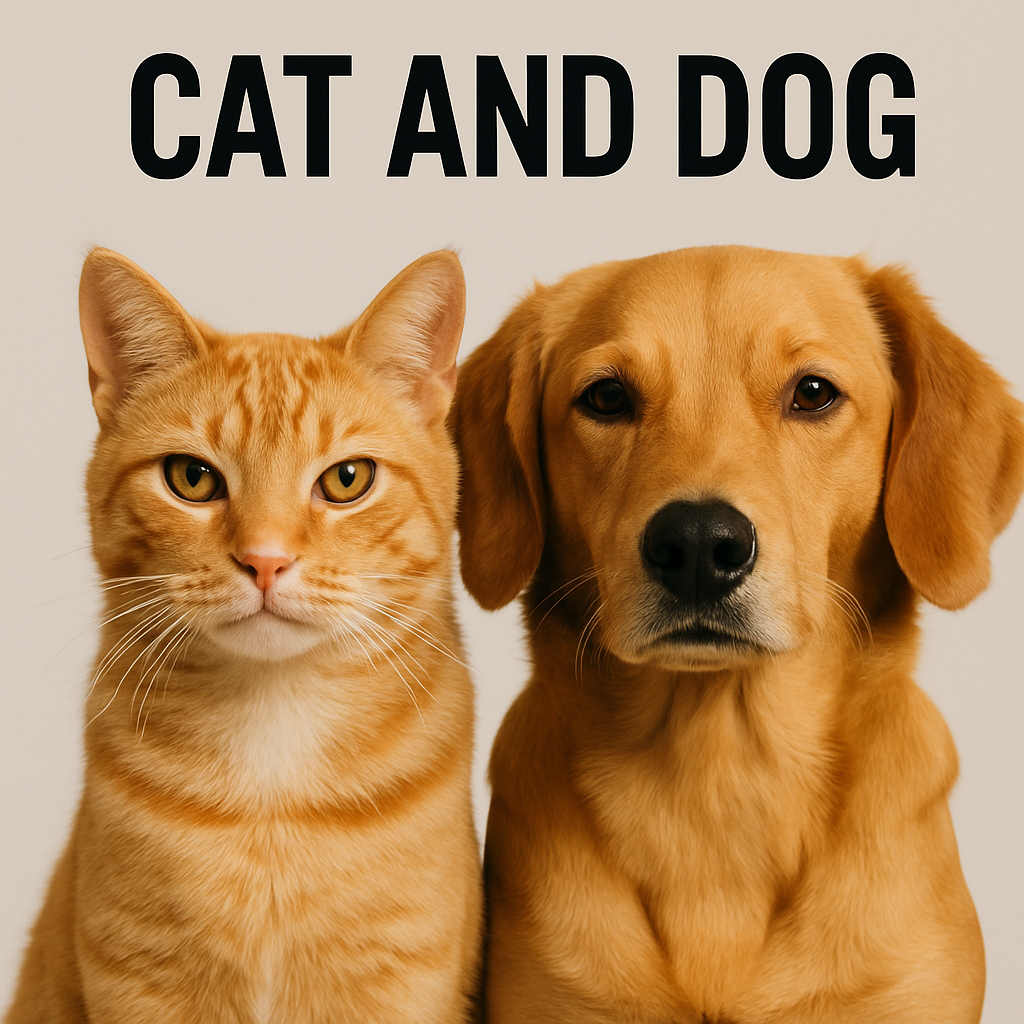

In [ ]:
from google import genai 
from google.genai import types 
from PIL import Image

client =  genai.Client(api_key=api_key)

image = Image.open('cat_dog.png')
image


In [32]:
prompt =" discribe this image in one sentence "

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents=[image, prompt]
    )

print(response.text)

This image features a headshot portrait of an orange cat and a golden dog looking directly forward, with the words "CAT AND DOG" written in black capital letters across the top.


In [33]:
prompt =" give me the caption for this image "

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents=[image, prompt]
    )

print(response.text)

Here are a few options for the caption, depending on the desired tone:

**Option 1 (Direct and Descriptive):**
"**CAT AND DOG** - A ginger cat and a golden dog pose together, looking directly at the camera."

**Option 2 (Simple and Evocative):**
"The classic duo: a ginger cat and a golden dog, perfectly titled 'CAT AND DOG'."

**Option 3 (Focus on the composition):**
"A striking portrait featuring an orange tabby cat and a golden dog side-by-side, with the prominent label 'CAT AND DOG' above them."


In [34]:
prompt =" can you give me the exact location of the dog so that i can find the dog in the image "

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents=[image, prompt]
    )

print(response.text)

The dog is located on the **right side** of the image.

More precisely, using normalized coordinates (where 0,0 is the top-left corner and 1,1 is the bottom-right corner of the image):

The bounding box for the dog is approximately:
*   **X-min (left edge):** 0.45 (45% from the left edge of the image)
*   **Y-min (top edge):** 0.28 (28% from the top edge of the image)
*   **X-max (right edge):** 1.00 (100% from the left edge, i.e., the right edge of the image)
*   **Y-max (bottom edge):** 1.00 (100% from the top edge, i.e., the bottom edge of the image)

This means the dog occupies the area starting slightly left of the image's vertical center, extending all the way to the right edge, and from just below the "AND DOG" text down to the bottom of the image.


In [35]:
image_1=Image.open('cat_dog.png')
image_2=Image.open('cat_dog_image.png')

prompt ="give me the diffrences between given two images ."

response= client.models.generate_content(
    model= "gemini-2.5-flash",
    contents=[ image_1 , image_2 , prompt ]
    )

print(response.text)

Here are the key differences between the two images:

1.  **Artistic Style:**
    *   **Image 1:** Features realistic, photographic representations of a cat and a dog.
    *   **Image 2:** Features cartoon, illustrative, and simplified drawings of a cat and a dog.

2.  **Presence of Text:**
    *   **Image 1:** Contains the prominent text "CAT AND DOG" at the top.
    *   **Image 2:** Contains no text.

3.  **Animal Details & Realism:**
    *   **Image 1:** Shows detailed fur, realistic eyes, noses, and proportions for both animals. The cat appears to be an orange tabby, and the dog a Golden Retriever. Their expressions are neutral and serious.
    *   **Image 2:** Shows simplified shapes, exaggerated features (e.g., larger heads, dot eyes), and no fur detail. The cat is a solid orange, and the dog is light brown with darker brown ears, a tail tip, and a spot over one eye. Both animals have happy, smiling expressions.

4.  **Overall Composition/Framing:**
    *   **Image 1:** A close-u

In [37]:
#Read text in images (OCR)
prompt ="find the all object from the given image"
response = client.models.generate_content(
    model = 'gemini-2.5-flash' ,
    contents = [image_1 ,prompt ] ,
    config = types.GenerateContentConfig(
        system_instruction =" please give me basic human like answers" 
    )
)

print(response.text)



Okay, looking at this picture, I can see a few things pretty clearly:

*   First off, there's a **cat** on the left side.
*   And right next to it, on the right, is a **dog**.
*   Then, at the very top, there's some **text** that says "**CAT AND DOG**".
*   And it all seems to be against a **plain, light-colored background**.


In [38]:
prompt = """ FInd all main objects in the image,
for each object , return JSON:
     {"label":"...." , "box_2d":[ymin,xmin,ymax,xmax]}  scaled to 0-100
     """


In [41]:
response = client.models.generate_content(
    model = 'gemini-2.5-flash' ,
    contents = [image_1 ,prompt ]
)

print(response.text)

```json
[
  {"label": "text \"CAT AND DOG\"", "box_2d": [18,124,196,878,136]},
  {"label": "cat", "box_2d": [232,0,1000,296,447,447]},
  {"label": "dog", "box_2d": [232,442,1000,557,557,296]}
]
```


In [67]:
from IPython.display import display, Markdown

object = Markdown(response.text)


In [68]:
from PIL import Image, ImageDraw, ImageFont
draw= ImageDraw.Draw(image_2) # add canvas
font= ImageFont.load_default() # add labels

In [69]:
H,W=image_2.size

In [70]:
object

```json
[
  {"label": "text \"CAT AND DOG\"", "box_2d": [18,124,196,878,136]},
  {"label": "cat", "box_2d": [232,0,1000,296,447,447]},
  {"label": "dog", "box_2d": [232,442,1000,557,557,296]}
]
```

In [ ]:
for obj in object:
  label= obj["label"]
  ymin, xmin, ymax, xmax = obj["box_2d"]

  x1, y1 = int(xmin / 1000 * W), int(ymin / 1000 * H)
  x2, y2 = int(xmax / 1000 * W), int(ymax / 1000 * H)

  # draw rectangle
  draw.rectangle([x1,y1,x2,y2], outline="Red", width=3)


  #label
  draw.text((x1 + 2, y1 - th - 2), label, fill="black", font=font)



display(image_2)